# OK so first thought is that the seed messed stuff up! 

so gotta try again with --random_seed == 0 and see if that makes a difference?

While its running, set up all eval code. also look into the code itself for bugs

In [1]:
from utils import vis, dfuncs
import math
import pandas as pd

# 1. Is the tenth still good as before after regeneration?

Have retraining with tenth for indices 0-20

Get QQ plots then I think

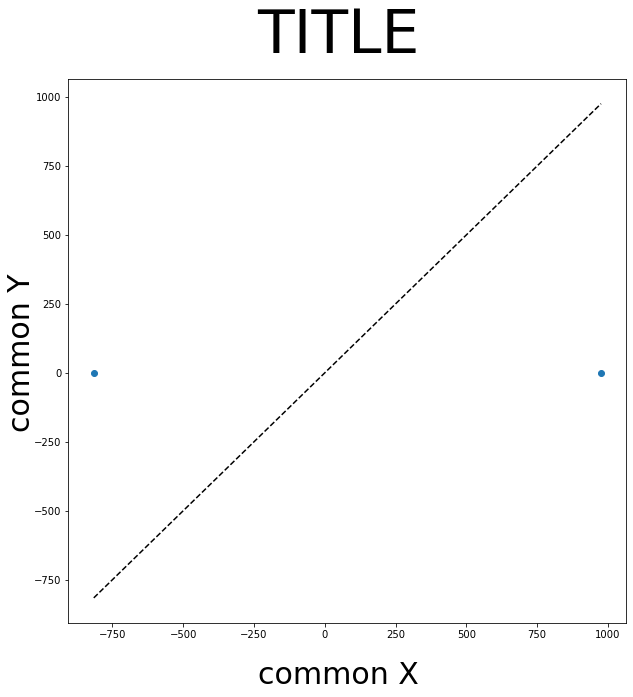

<Figure size 432x288 with 0 Axes>

In [16]:
data = dfuncs.getQQplotData(f1='retr_div10_9', idx_range=1, retrained=True)
cfgs = vis.getConfigs(size=10, qq=True)

vis.graph('qq', data, cfgs)


In [15]:
for i in range(10):
    data = data_funcs.loadPreds('div10', i)
    info = data_funcs.getBasicDistrInfo(data)
    print(info['median'])


NameError: name 'data_funcs' is not defined

In [47]:
data = data_funcs.loadPreds('tenth-0', 16)
info = data_funcs.getBasicDistrInfo(data)

for i in info:
    print(i, info[i])

max 29097.957169148533
min -35421.28781983883
mean -29.442237293845793
median -1.062434983965487
std 2273.8484501105672


In [9]:
pred, actual = dfuncs.loadRetraining('retr_div10', 3)

In [10]:
pred

[-47225.415589310556,
 48586.932880319335,
 -49779.203356336875,
 49854.808887039275,
 -50005.11044774339,
 -50315.77498020892,
 -52660.603518556614,
 -57842.092128903736,
 58057.32390735331,
 58821.64590108503,
 58835.86633082754,
 59768.88501015082,
 -61018.09450974828,
 61379.41331532489,
 -63466.29490749138,
 70280.87307648858,
 73534.3025851173,
 76927.13292289569,
 85095.36110271758,
 104635.78222525978]

# 1b. Does different random seeds affect?

Yes

Do another random seed later tho so idk

need to re-run but on the same exact things

but getting rid of the np.random seed thing completely seems to make it worse too...


maybe 10th wasnt working and i just got lucky?? why is it not matching for retraining now? Maybe should focus on getting a condition where retraining works, then moveond


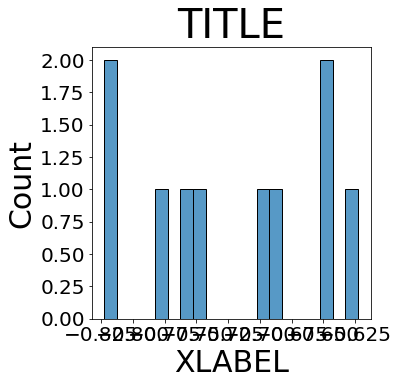

<Figure size 432x288 with 0 Axes>

In [5]:
f1 = 'tenth-3'
f2 = 'tenth-9'


cors, ps = data_funcs.correlateTwoFoldersExtreme(f1, f2)
vis.graph('hist', cors)

In [6]:
dfs = []

for seed in [0, 3, 9]:
    folder = 'tenth-%s' % seed
    all_medians = []
    for idx in range(5):
        infs = data_funcs.loadPreds(folder, idx)
        info = data_funcs.getBasicDistrInfo(infs)
        
        all_medians.append({'median inf': info['median'], 'seed': seed, 'test idx': idx})
        
    dfs.append(pd.DataFrame(all_medians))
    
df = pd.concat(dfs)


In [7]:
data_funcs.getBasicDistrInfo(df['median inf'].values)

{'max': 21387541.71276234,
 'min': -466.82966822827404,
 'mean': 1426487.3691551178,
 'median': -2.0685540200343198e-07,
 'std': 5522059.994301768}

In [8]:
df

,median inf,seed,test idx
0,-3.357971e-07,0,0
1,-2.068554e-07,0,1
2,-6.558587e-07,0,2
3,-6.852807e-07,0,3
4,-6.733611e-07,0,4
0,-8.852059e-04,3,0
1,-4.922734e-06,3,1
2,4.906076e+00,3,2
3,-1.666969e-07,3,3
4,2.024836e-01,3,4


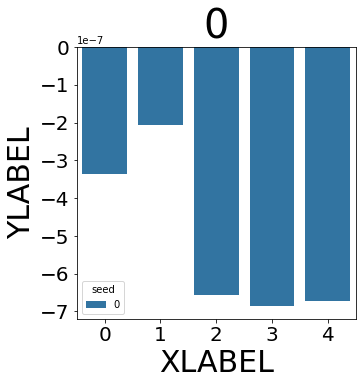

<Figure size 432x288 with 0 Axes>

In [9]:
cfgs = vis.getConfigs()
cfgs['x'] = 'test idx'
cfgs['y'] = 'median inf'
cfgs['hue'] = 'seed'
cfgs['title'] = 0

vis.graph('bar-hue', dfs[0], cfgs)

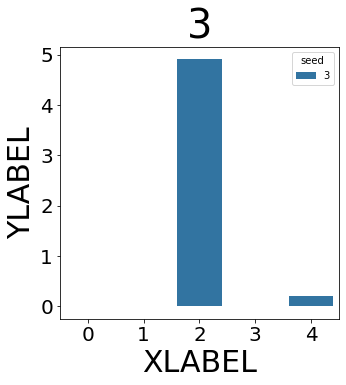

<Figure size 432x288 with 0 Axes>

In [10]:
cfgs['title'] = 3
vis.graph('bar-hue', dfs[1], cfgs)

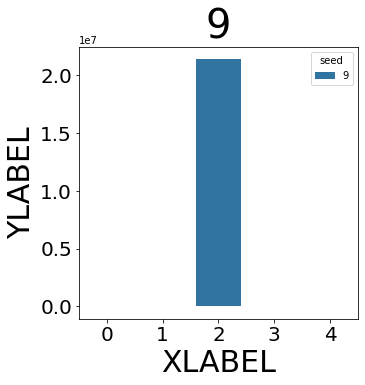

<Figure size 432x288 with 0 Axes>

In [11]:
cfgs['title'] = 9
vis.graph('bar-hue', dfs[2], cfgs)

### oy ok so hard to graph because a bajillion diff scales

In [44]:
extr_medians = []
zero_medians = []
medians = {}
orders = []
for idx in range(9):
    infs = data_funcs.loadPreds('tenth-0', idx)
    info = data_funcs.getBasicDistrInfo(infs)
    
    med = info['median']
    order = math.floor(math.log10(abs(med)))
    
    if order not in medians:
        medians[order] = []
    medians[order].append(med)
    if med < 0.5 and med > -0.5:
        zero_medians.append(med)
    else:
        extr_medians.append(med)
    orders.append(order)
    

In [45]:
len(extr_medians), len(zero_medians), len(medians)

(0, 9, 3)

<AxesSubplot:ylabel='Count'>

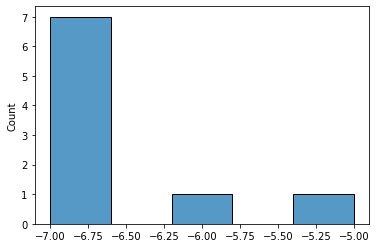

In [46]:
import seaborn as sns
sns.histplot(orders)

In [31]:
for i in sorted(medians.keys()):
    print(i, len(medians[i]))

-7 1
-6 4
-5 8
-4 14
-3 12
-2 18
-1 19
0 13
1 14
2 12
3 7
4 11
5 5
6 6
7 3
8 1
10 2


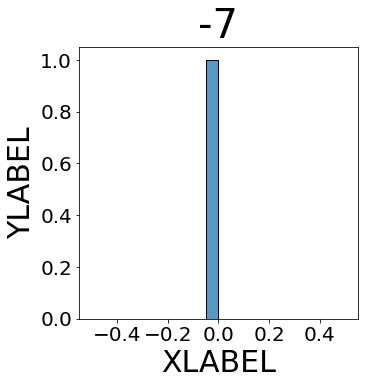

<Figure size 432x288 with 0 Axes>

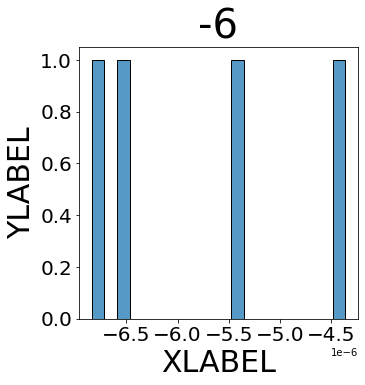

<Figure size 432x288 with 0 Axes>

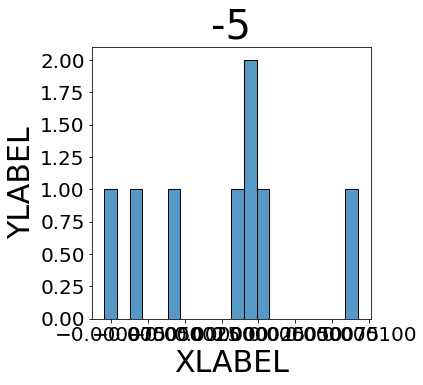

<Figure size 432x288 with 0 Axes>

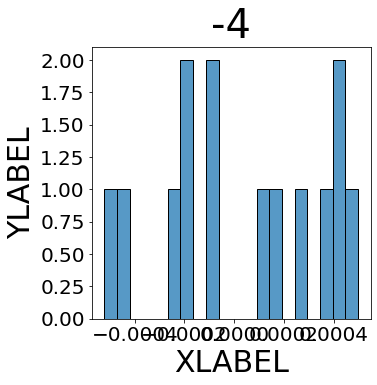

<Figure size 432x288 with 0 Axes>

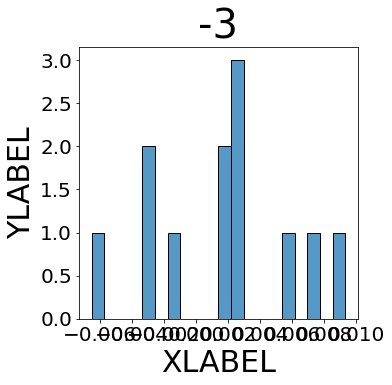

<Figure size 432x288 with 0 Axes>

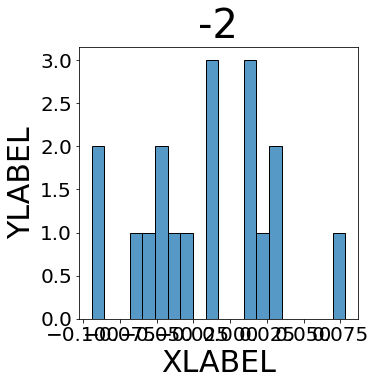

<Figure size 432x288 with 0 Axes>

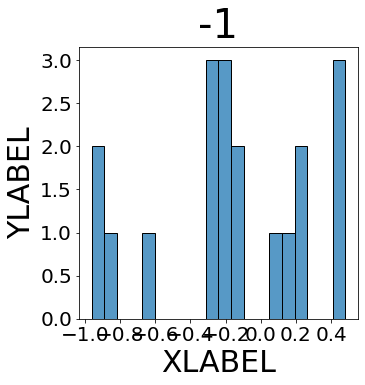

<Figure size 432x288 with 0 Axes>

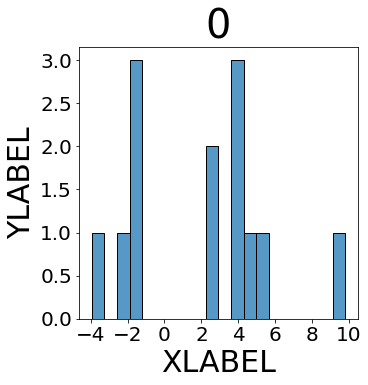

<Figure size 432x288 with 0 Axes>

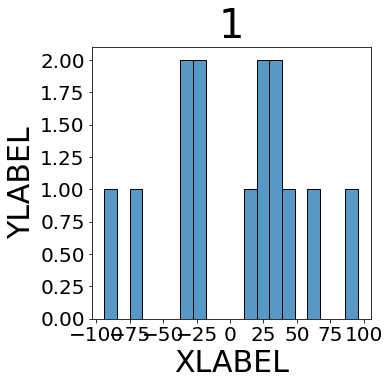

<Figure size 432x288 with 0 Axes>

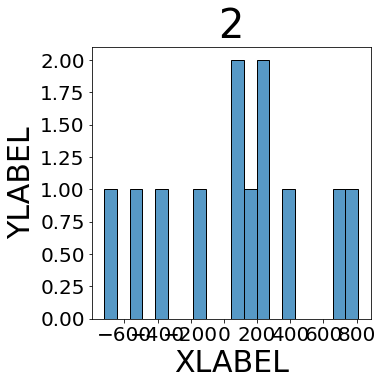

<Figure size 432x288 with 0 Axes>

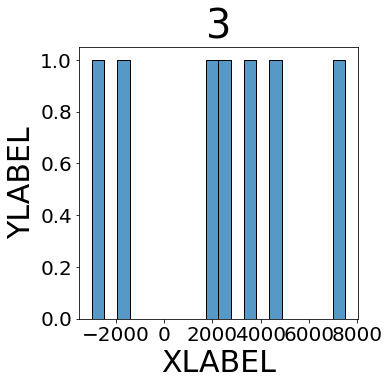

<Figure size 432x288 with 0 Axes>

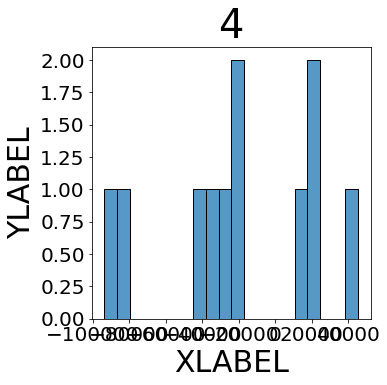

<Figure size 432x288 with 0 Axes>

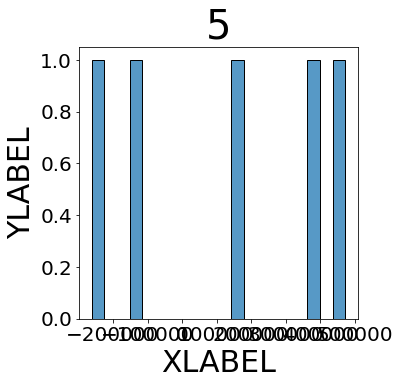

<Figure size 432x288 with 0 Axes>

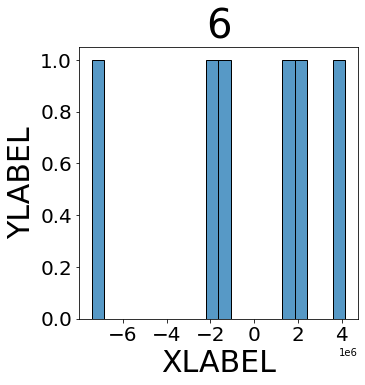

<Figure size 432x288 with 0 Axes>

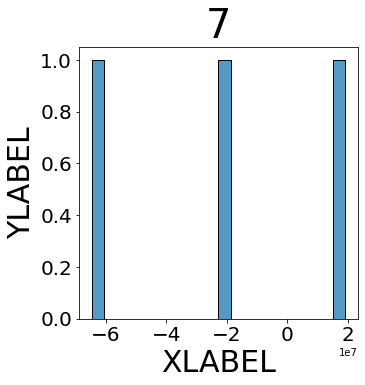

<Figure size 432x288 with 0 Axes>

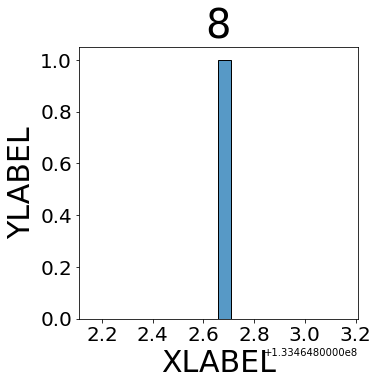

<Figure size 432x288 with 0 Axes>

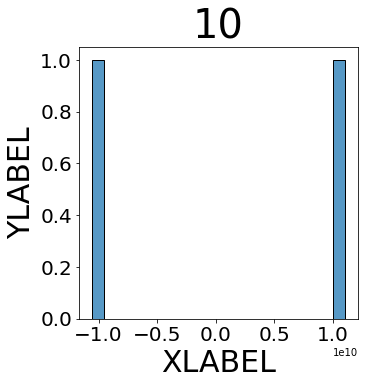

<Figure size 432x288 with 0 Axes>

In [33]:
cfgs = vis.getConfigs()

for i in sorted(medians.keys()):
    cfgs['title'] = i
    vis.graph('hist', medians[i], cfgs)

# What if no random seed?

# 2. Is full vs one still bad after regeneration?

# 3. How does it change with different divisors?